# $\pi$!!!


Some facts:

* The area of the circle is $\pi r^2$
  * Therefore, the area of a circle with $r = 0.5$  is $\frac{\pi}{4}$
* The area of a square is $a^2$
  * Therefore, the area of a square with $a = 1$  is.... $1$
* If, at the same center point, we draw a circle with $r = 0.5$ and a square with $a = 1$, the circle will fit nicely in the square

So what? Well, if we calculate the ratio of the area of the circle to the area of the square we have:
$$\frac{\frac{\pi}{4}}{1} = \frac{\pi}{4}$$

With this knowledge, we can approximate $\pi$ with the following method: 

1. Start with 2 variables `n_in_circle` & `n_total`
* Randomly drop a point in the square and add 1 to `n_total`
  * If the point falls in the circle, add 1 to `n_in_circle`
* Repeat previous steps as much as you like (the more points the better the approximation)
* Calculate `n_in_circle / n_total`. This should approximate $\frac{\pi}{4}$; multiply by 4 to approximate $\pi$

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Note, there are 'better'/prettier ways to do/animate this approximation, but I wanted to stick with minimal libraries and only ones we've seen so far.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

Let's write some code to come up with points to draw a circle.  We're gonna use some trig and work in radians (since that's what the `numpy` trig functions use).

More facts:
* In degrees, a circle goes from 0 to 360, and in radians, a circle goes from 0 to 2$\pi$
* Given an angle, $a$, and a radius, $r$, we can calculate the $(x, y)$ coordinates with:

$$x = r * cos(a)$$
$$y = r * sin(a)$$

In [3]:
r = 0.5
n_points = 50

start = 0
stop = 2 * np.pi
step = stop / n_points

# Using a function from `numpy` and the variables `start`, `stop`, and `step`.
# Calculate the angles for all the points in our circle.
# Hint: Use `stop + step` as the actual stop point in your function call
# (This will allow the circle to be 'closed' since the stop point is 'exclusive'
# in the function I'm intending for you to use)
angles = np.arange(start, stop + step, step)

circle_xs = []
circle_ys = []
for a in angles:
    x = r * np.cos(a)
    y = r * np.sin(a)

    # Add the x and y points to our lists for cicle point xs & ys
    circle_xs.append(x)
    circle_ys.append(y)

<IPython.core.display.Javascript object>

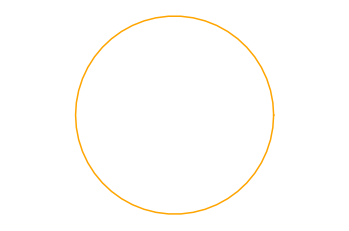

<IPython.core.display.Javascript object>

In [4]:
# Plot the circle using the color orange
plt.plot(circle_xs, circle_ys, c="orange")

# Comment/uncomment these `plt.axis` commands to see what they're doing
plt.axis("equal")
plt.axis("off")
plt.show()

The square is a little less work.  Let's just hardcode the vertex coordinates and call it a day.

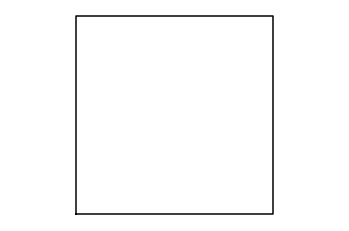

<IPython.core.display.Javascript object>

In [5]:
square_xs = [-0.5, -0.5, 0.5, 0.5, -0.5]
square_ys = [-0.5, 0.5, 0.5, -0.5, -0.5]

# Plot the square using the color black
plt.plot(square_xs, square_ys, c="black")
plt.axis("equal")
plt.axis("off")
plt.show()

All together now!

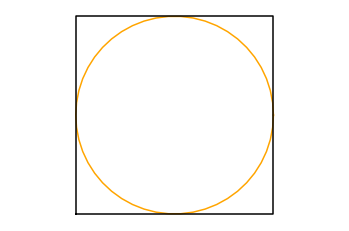

<IPython.core.display.Javascript object>

In [6]:
# Plot the circle using the color orange
plt.plot(circle_xs, circle_ys, c="orange")

# Plot the square using the color black
plt.plot(square_xs, square_ys, c="black")

plt.axis("equal")
plt.axis("off")
plt.show()

Ok, now we also need a way to check if a point is in or outside of the circle.  We could do this by checking if the point is further than $r$, 0.5, away from the center point, $(0, 0)$.  We can write a quick function to give us the 'euclidean distance' between to points, $(x_1, y_1)$ & $(x_2, y_2)$.  The formula for this distance metric is:

$$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

In [7]:
def dist(p1, p2):
    x1, y1 = p1
    x2, y2 = p2

    # Code out the distance calculation shown above
    d = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

    return d

<IPython.core.display.Javascript object>

Home stretch!  We're now all set up to generate points, approximate pi, and visualize it.

In [8]:
n_total = 0
n_in_circle = 0

<IPython.core.display.Javascript object>

We can now manually run the below code repeatedly and see our approximation of pi and where the point fell on the plot

Approximation of pi: 4.00000


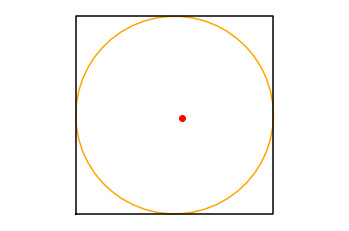

<IPython.core.display.Javascript object>

In [9]:
x, y = np.random.uniform(-0.5, 0.5, 2)

n_total += 1
c = "black"

# Check if the point falls within the circle
if dist((0, 0), (x, y)) <= 0.5:
    n_in_circle += 1
    c = "red"


my_pi = 4 * n_in_circle / n_total
print(f"Approximation of pi: {my_pi:.5f}")

plt.plot(circle_xs, circle_ys, c="orange")
plt.plot(square_xs, square_ys, c="black")
plt.scatter(x, y, c=c)
plt.axis("equal")
plt.axis("off")
plt.show()

Let's introduce a loop to do the above process for us.

Approximation of pi: 3.14488


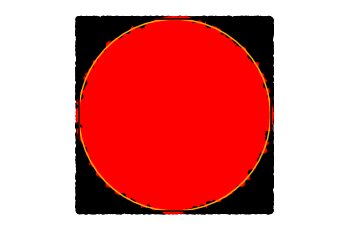

<IPython.core.display.Javascript object>

In [10]:
n_iterations = 50000

n_total = 0
n_in_circle = 0

xs = []
ys = []
cs = []
for i in range(n_iterations):
    x, y = np.random.uniform(-0.5, 0.5, 2)

    n_total += 1
    c = "black"

    # Check if the point falls within the circle
    if dist((0, 0), (x, y)) <= 0.5:
        n_in_circle += 1
        c = "red"

    # Store the x, y, and c for this point
    xs.append(x)
    ys.append(y)
    cs.append(c)


my_pi = 4 * n_in_circle / n_total
print(f"Approximation of pi: {my_pi:.5f}")

plt.plot(circle_xs, circle_ys, c="orange")
plt.plot(square_xs, square_ys, c="black")
plt.scatter(xs, ys, c=cs)
plt.axis("equal")
plt.axis("off")
plt.show()

Last bit... instead of only showing everything after the loop is down.  Let's see some updates while its running.

To clean up the code, let's wrap the display code in a function (we're gonna be lazy and not use any arguments, but just ask for variables from the global environment).

In [11]:
# This is prolly not best practice, but it's easy
def show_approximation():
    plt.plot(circle_xs, circle_ys, c="orange")
    plt.plot(square_xs, square_ys, c="black")
    plt.scatter(xs, ys, c=cs)
    plt.axis("equal")
    plt.axis("off")
    plt.show()

    # Per Emily's suggestion, we will also include a plot
    # to show our approximation is changing over time
    if len(pis) > 1:
        plt.plot(pis, label="our approx")
        plt.axhline(np.pi, c="black", label="true pi")
        plt.xlabel("Iteration")
        plt.ylabel("Approximated Value of pi")
        plt.legend()
        plt.show()

<IPython.core.display.Javascript object>

Now we need a way to print every `n` iterations.  We can do a 'modulo operation'.  This is done with `%` and will give us the remainder of dividing two given numbers.  For example: 

* `4 % 2 = 0` because there is no remainder when performing `4 / 2`
* `5 % 2 = 1` because there is a remainder of 1 when performing `5 / 2`

To use this in our loop to print every `n` we can check the remainder of `i % print_every_n`.  When there is no remainder we will display our simulation output.

After 4001 iterations:
Approximation of pi: 3.12122


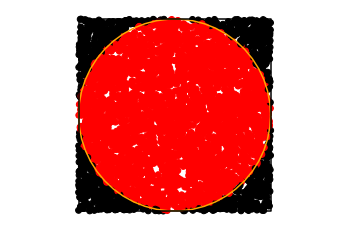

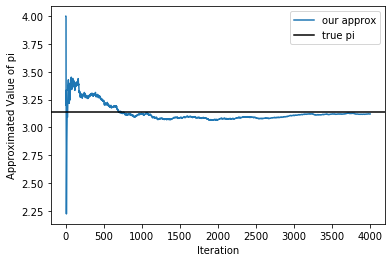

After 8001 iterations:
Approximation of pi: 3.14311


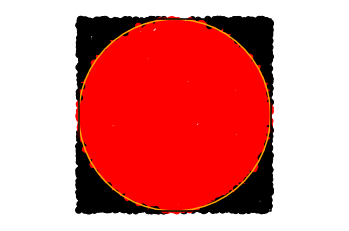

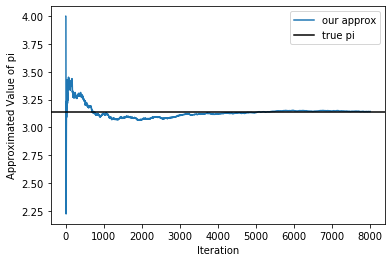

Final
----------------------------
After 10000 iterations:
Approximation of pi: 3.13840


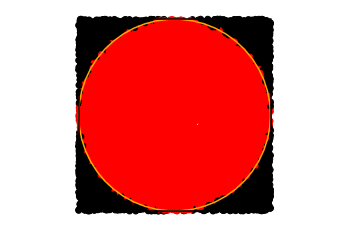

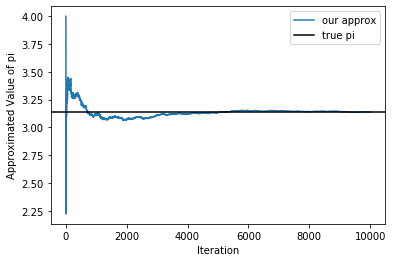

<IPython.core.display.Javascript object>

In [12]:
n_iterations = 10000
print_every_n = 4000

n_total = 0
n_in_circle = 0

xs = []
ys = []
cs = []
pis = []
for i in range(n_iterations):
    x, y = np.random.uniform(-0.5, 0.5, 2)

    n_total += 1
    c = "black"

    # Check if the point falls within the circle
    if dist((0, 0), (x, y)) <= 0.5:
        n_in_circle += 1
        c = "red"

    # Store the x, y, and c for this point
    xs.append(x)
    ys.append(y)
    cs.append(c)

    curr_approx_pi = 4 * n_in_circle / n_total
    pis.append(curr_approx_pi)

    # Check if we should display on this iteration.
    # If yes, display the approximation/plot using the function defined above
    if i % print_every_n == 0 and i > 0:
        print(f"After {i + 1} iterations:")
        print(f"Approximation of pi: {curr_approx_pi:.5f}")

        show_approximation()


print("Final\n----------------------------")
print(f"After {i + 1} iterations:")
print(f"Approximation of pi: {curr_approx_pi:.5f}")
show_approximation()

For comparison:

In [13]:
print(np.pi)

3.141592653589793


<IPython.core.display.Javascript object>